### Section 1 - Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 1.1 Load the dataset into a dataframe named df
df = pd.read_csv("housing.csv")

In [3]:
#1.2 Print the number of rows and columns in the dataframe.
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 20640
Number of columns: 10


In [4]:
# 1.3 Print the first 5 rows of the dataframe.
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Section 2 -Performing Exploratory Data Analysis on the dataset

In [5]:
# 2.1 Print name of all the columns and type of each column (numerical or categorical)
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column Name: {column}, Data Type: {data_type}")

Column Name: longitude, Data Type: float64
Column Name: latitude, Data Type: float64
Column Name: housing_median_age, Data Type: float64
Column Name: total_rooms, Data Type: float64
Column Name: total_bedrooms, Data Type: float64
Column Name: population, Data Type: float64
Column Name: households, Data Type: float64
Column Name: median_income, Data Type: float64
Column Name: median_house_value, Data Type: float64
Column Name: ocean_proximity, Data Type: object


Skew for col: housing_median_age = 0.060330637599136865
mean = 28.639486434108527
median = 29.0


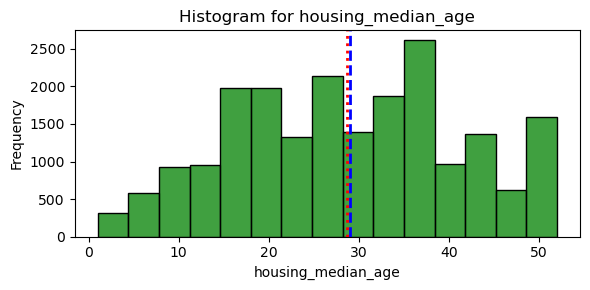

Skew for col: total_rooms = 4.147343450632158
mean = 2635.7630813953488
median = 2127.0


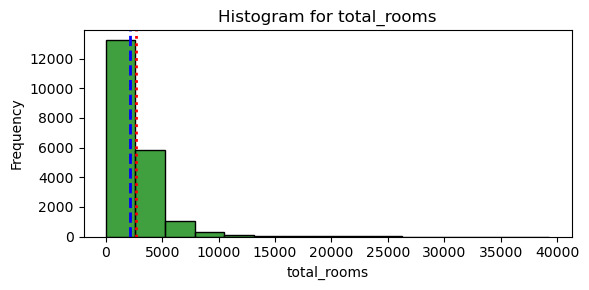

Skew for col: total_bedrooms = 3.459546331523342
mean = 537.8705525375618
median = nan


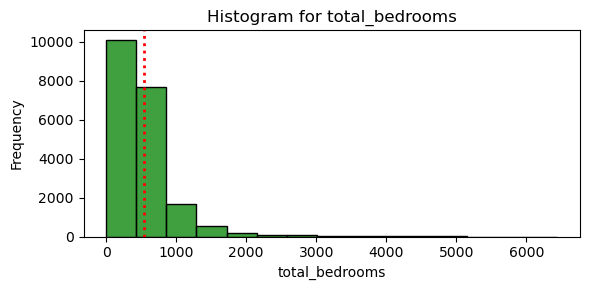

Skew for col: population = 4.93585822672712
mean = 1425.4767441860465
median = 1166.0


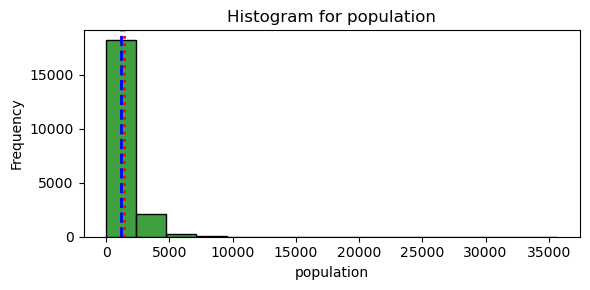

Skew for col: households = 3.410437711667147
mean = 499.5396802325581
median = 409.0


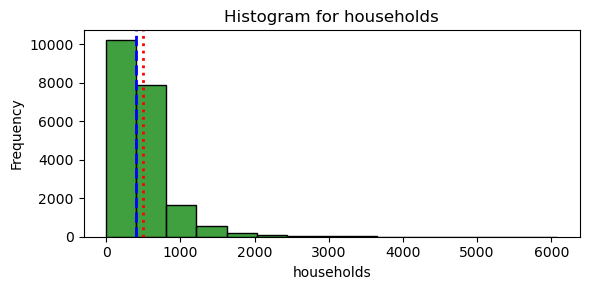

Skew for col: median_income = 1.6466567021344465
mean = 3.8706710029069766
median = 3.5347999999999997


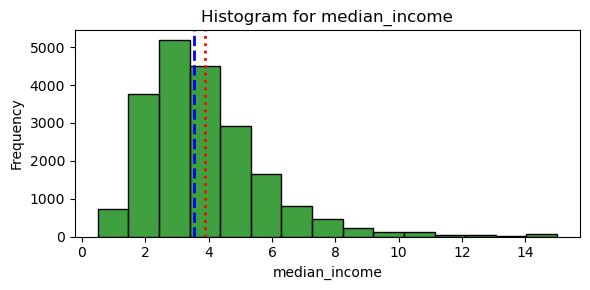

Skew for col: median_house_value = 0.9777632739098341
mean = 206855.81690891474
median = 179700.0


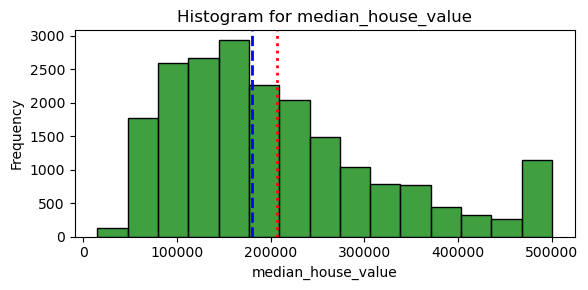

In [6]:
# 2.2 For all the numerical columns plot the histogram distribution and write your observations about them. (Except latitude and longitude)

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(['latitude', 'longitude'], axis=1)

# Plot histograms for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=numerical_columns, x=column, bins = 15, color='green')
    plt.axvline(df[column].mean(), color="red", linestyle="dotted", linewidth=2)
    plt.axvline(np.median(df[column]), color="blue", linestyle="dashed", linewidth=2)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    print(f'Skew for col: {column} = {df[column].skew()}')
    print(f'mean = {df[column].mean()}')
    print(f'median = {np.median(df[column])}')
    plt.tight_layout()
    plt.show()
    

Observations:

Observations for housing_median_age:
The distribution appears roughly symmetrical. The mean and median are close to the center of the distribution. There are no extreme outliers or a significant concentration of data points on one side.

Observations for total_rooms, total_bedrooms, population, households and median_income: 
The distribution is right skewed, also known as a positively skewed distribution. The majority of the data        points are concentrated on the left side of the distribution, while a smaller number of data points with relatively high values extend out to the right. Here the mean>median due to the influence of outliers on the right tail.
However, total_bedrooms does not have a median since there are NaN values present.

Observations for median_house_value: 
The distribution appers to be right skewed but with a peak in the end. This suggests that there is a concentration of data points at the higher end of the distribution. Here the mean>median due to the long right tail. The peak at the end could be due to the presence of outliers.

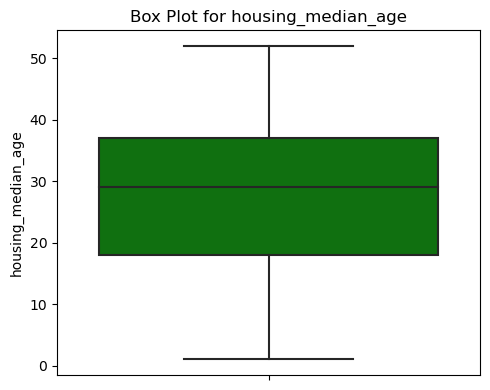

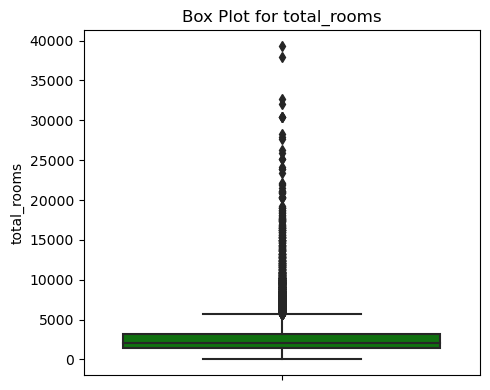

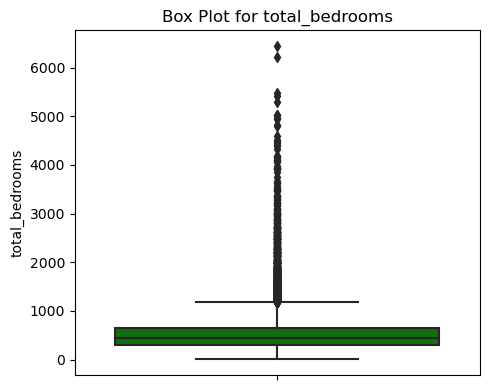

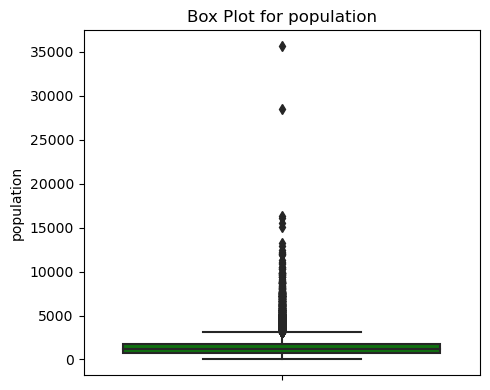

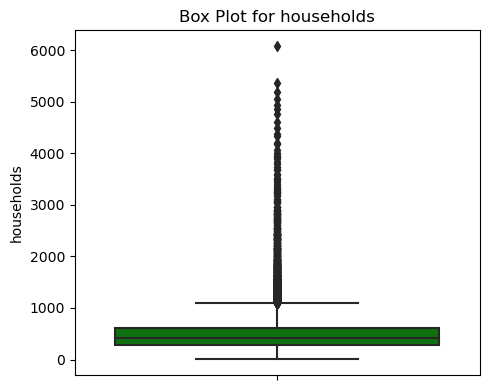

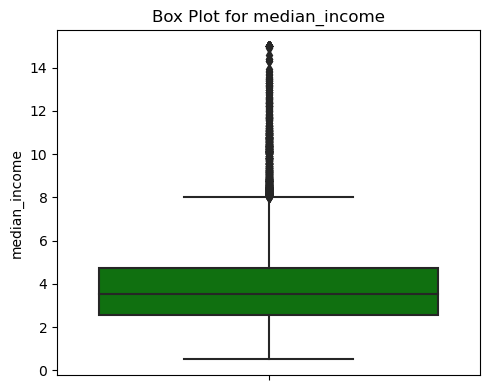

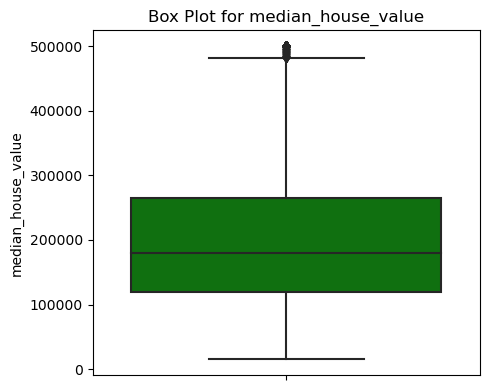

In [7]:
# 2.3 For all the numerical columns plot the box plots and check if there are outliers in any of the column. (Except latitude and longitude)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(['latitude', 'longitude'], axis=1)

# Plot box plots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=numerical_columns, y=column, color="green")
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [8]:
# Check for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
for column in numerical_columns.columns:
    q1 = numerical_columns[column].quantile(0.25)
    q3 = numerical_columns[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = numerical_columns[(numerical_columns[column] < lower_bound) | (numerical_columns[column] > upper_bound)]

    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers)
        print("\n")
#outliers.shape

Outliers in total_rooms:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
101      -122.25     37.81                28.0       5806.0          1603.0   
104      -122.26     37.81                34.0       5871.0          1914.0   
185      -122.23     37.79                43.0       5963.0          1344.0   
283      -122.16     37.79                22.0      12842.0          2048.0   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                33.0       6861.0          1820.0   
20544    -121.76     38.55                23.0       8800.0          1857.0   
20563    -121.75     38.67                 9.0      12139.0          2640.0   
20567    -121.79     38.66                15.0       6809.0          1052.0   
20629    -121.39     39.12                28.0      10035.0          1856.0   

       population  househo

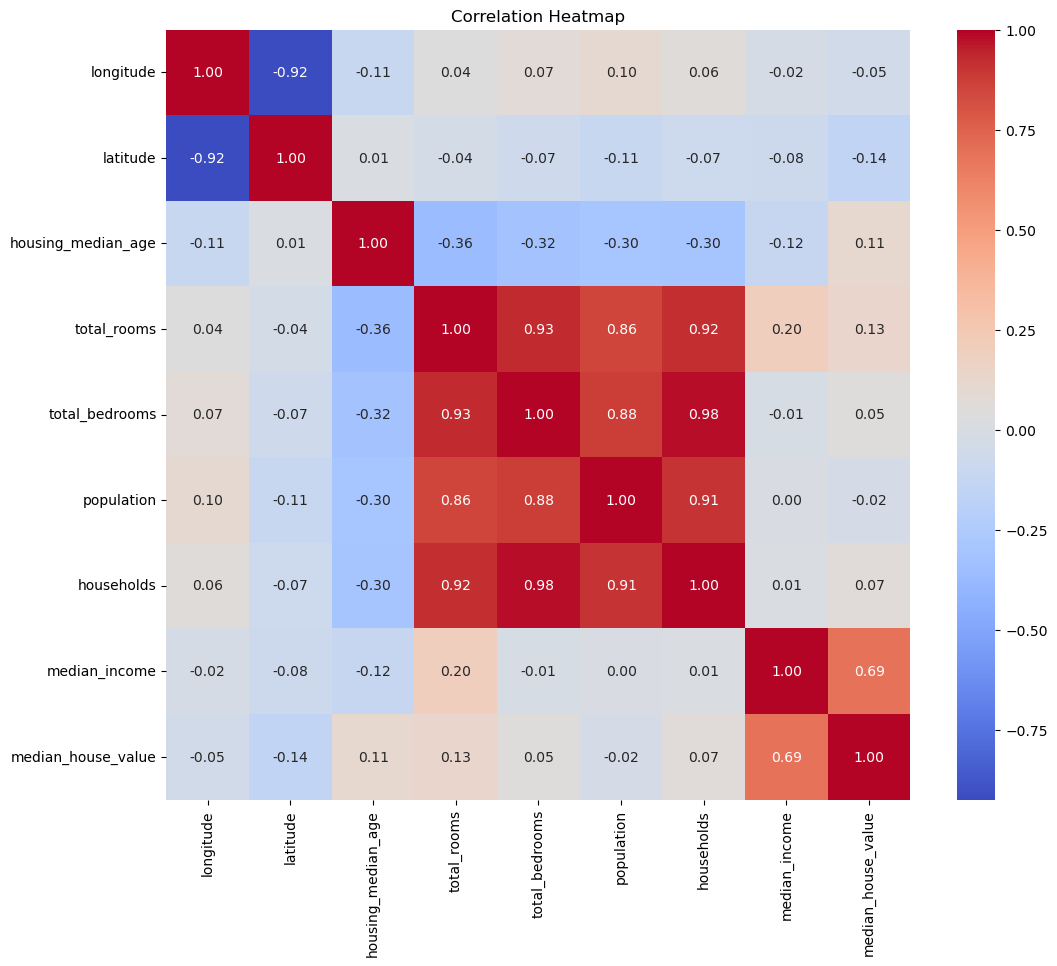

Correlation with median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [9]:
# 2.4 Plot a heatmap and check whether there is a correlation between different numerical features. Also check the correlation of different features with the target feature median_house_value.

numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Correlation with the target feature (median_house_value)
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with median_house_value:")
print(correlation_with_target)

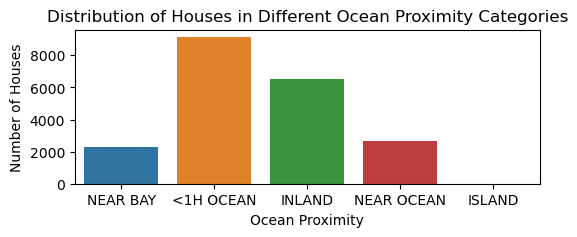

In [10]:
# 2.5 Plot a barplot to check how many houses are in different subcategories of the feature ‘ocean_proximity'

plt.figure(figsize=(6, 2))
sns.countplot(data=df, x='ocean_proximity')
plt.title("Distribution of Houses in Different Ocean Proximity Categories")
plt.xlabel("Ocean Proximity")
plt.ylabel("Number of Houses")
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Section 3- Preprocessing the dataset

In [11]:
# 3.1 Find if there are any NaN values in the dataset

# nan_counts = df.isnull().sum()
# # Check if there are any NaN values
# if nan_counts.sum() == 0:
#     print("No NaN values found in the dataset.")
# else:
#     print("NaN values found in the following columns:")
#     print(nan_counts[nan_counts > 0])

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#median of total bedrooms
df['total_bedrooms'].median()

435.0

In [13]:
# 3.2 Impute the NaN values with the median value of the column

# df = df.fillna(df.median(numeric_only=True))
# nan_counts = df.isna().sum()

# if nan_counts.sum() == 0:
#     print("NaN values have been successfully imputed with column medians.")
# else:
#     print("NaN values remain in the following columns:")
#     print(nan_counts[nan_counts > 0])

df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [14]:
#check for NaN values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
# 3.3 Remove the outlier datapoints from the dataset

numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Define a function to remove outliers using the IQR method
def remove_outliers(dataframe, columns):
    for column in columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        dataframe = dataframe[(dataframe[column] < upper_bound) & (dataframe[column] > lower_bound)]
    return dataframe

df_cleaned = remove_outliers(dataframe = df, columns = numerical_columns.columns)

# Display the shape of the cleaned DataFrame to see how many outliers were removed
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (20640, 10)
Cleaned DataFrame shape: (16896, 10)


In [16]:
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
# 3.4 Encode the categorical variable ocean proximity using Label encoder or One hot encoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['ocean_proximity'] = label_encoder.fit_transform(df_cleaned['ocean_proximity'])

#for feature selection store dataframe in another variable
df_feature = df_cleaned

In [19]:
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


### Section 4. Splitting the dataset

In [20]:
# 4.1 Store the values of median_house_value feature in a variable named ‘target’ and then drop the feature from the dataframe. After this step you should have shape of df as 20640 x 9

# Store the 'median_house_value' feature in the 'target' variable
target = df_cleaned['median_house_value']

# Drop the 'median_house_value' feature from the DataFrame
df_cleaned = df_cleaned.drop(columns=['median_house_value'])

# Verify the shape of the DataFrame
print("Shape of df after dropping 'median_house_value':", df_cleaned.shape)


Shape of df after dropping 'median_house_value': (16896, 9)


In [21]:
target

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16896, dtype: float64

In [22]:
target.shape

(16896,)

In [23]:
# 4.2 Split df into X_train and X_test with test ratio 0.2. Similar create y_train and y_test
from sklearn.model_selection import train_test_split

X = df_cleaned
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

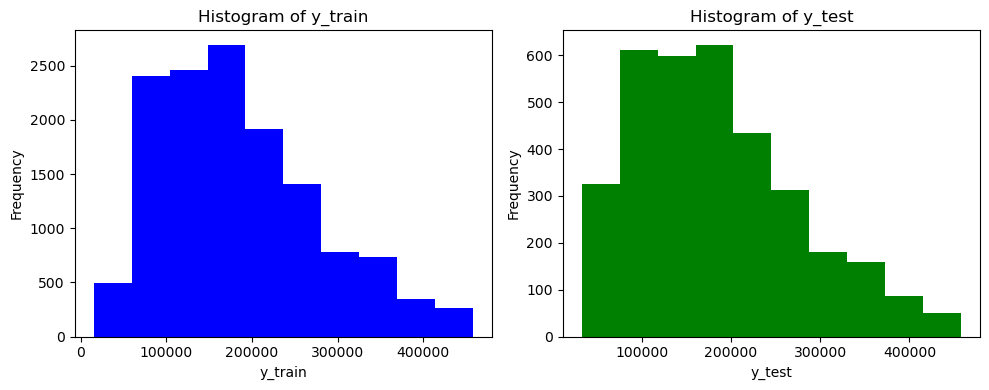

In [24]:
#4.3 Plot histogram distribution of y_train and y_test and check whether they follow similar distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y_train, color='blue')
plt.title('Histogram of y_train')
plt.xlabel('y_train')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, color='green')
plt.title('Histogram of y_test')
plt.xlabel('y_test')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms for y_train & y_test follow a similar distribution

### Section 5. Training the model


In [25]:
# 5.1 Define a Linear regression model and fit(train) the model only on train data

from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# 5.2 5.2 Compute the mean_squared_error and R square error on train_data and test_data for the model and write your observations on the performance of the model

from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R2 for the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Data - Mean Squared Error: ", mse_train)
print("Training Data - R-squared Error: ", r2_train)
print("Testing Data - Mean Squared Error: ", mse_test)
print("Testing Data - R-squared Error: ", r2_test)

Training Data - Mean Squared Error:  3295131818.105932
Training Data - R-squared Error:  0.6136819291019077
Testing Data - Mean Squared Error:  3158443400.4695196
Testing Data - R-squared Error:  0.6169841421616541


Observations on performance of the model:
1. When comparing the Mean Squared Error (MSE), it's evident that the model performs more effectively on the testing data, which is reflected in the lower MSE. This is a favorable indication of the model's ability to generalize to previously unseen data. A reduced MSE implies that the model's predictions on the testing dataset are more accurate.

2. In the context of the R-squared (R<sup>2</sup>) values, there is a close similarity between the training and testing data, with a slightly higher R2 for the testing dataset. An R2 value of around 0.61 signifies that the model accounts for approximately 61% of the variance in the target variable, indicating a moderate level of explanatory power. The slightly higher R2 for the testing data suggests that the model's capacity to explain variance extends well to new, unseen data.

3. The R2 values on both datasets are reasonable, signifying that the model possesses some predictive capability. Furthermore, the model's consistent performance on both the training and testing data underscores its strong generalization capacity, which is a favorable outcome.

### Section 6. Feature importance and Feature selection

In [27]:
# 6.1 Find top 3 features which are most useful in predicting the median_house_value

# correlation = df.corr()['target'].abs()

# # Sort the features by correlation in descending order
# top_features = correlation.sort_values(ascending=False).index[1:4] 
# print(top_features)

from sklearn.feature_selection import SelectKBest, f_regression

X = df_feature.drop('median_house_value', axis=1)
y = df_feature['median_house_value']

# Create an instance of SelectKBest with f_regression as the scoring function
k_best = SelectKBest(score_func=f_regression, k=3)

# Fit and transform the feature data to select the top k features
X_new = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the feature names of the selected features
selected_features = X.columns[selected_feature_indices]

print(selected_features)

Index(['latitude', 'total_rooms', 'median_income'], dtype='object')


In [28]:
# Filter the DataFrame to keep only the selected features and the target variable
df_filtered = df_feature[selected_features.append(pd.Index(['median_house_value']))]

# Separate the features and target variable
X = df_filtered.drop('median_house_value', axis=1)
y = df_filtered['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

# Calculate MSE and R2 for the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R2 for the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print("Training Data - Mean Squared Error (MSE): ", mse_train)
print("Training Data - R-squared Error (R2): ", r2_train)
print("Testing Data - Mean Squared Error (MSE): ", mse_test)
print("Testing Data - R-squared Error (R2): ", r2_test)


Training Data - Mean Squared Error (MSE):  4963711348.488047
Training Data - R-squared Error (R2):  0.4180592769896818
Testing Data - Mean Squared Error (MSE):  4915164291.649019
Testing Data - R-squared Error (R2):  0.40395136816366617


Observations:

Before Feature Selection:

1. Lower MSE: The model had a lower Mean Squared Error (MSE) on both training and testing data, indicating more accurate predictions and reduced prediction errors.
2. Higher R-squared (R2): The R2 values were higher, signifying better explanatory power and the ability to account for a larger portion of the target variable's variance.

After Feature Selection:

1. Higher MSE: After feature selection, the model's MSE increased significantly, implying reduced prediction accuracy and higher errors.
2. Lower R-squared (R2): The R2 values decreased after feature selection, indicating a diminished ability to explain the variance in the target variable.

In summary, the model's performance worsened after feature selection, with increased prediction errors (MSE) and reduced explanatory power (R2) on both training and testing data. This suggests that the feature selection process may have removed important features or simplified the model, resulting in decreased performance. Further model refinement or a reevaluation of the feature selection criteria may be necessary to enhance performance.